In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("UpdatedResumeDataSet.csv")

In [7]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [8]:
df.shape


(962, 2)

In [12]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

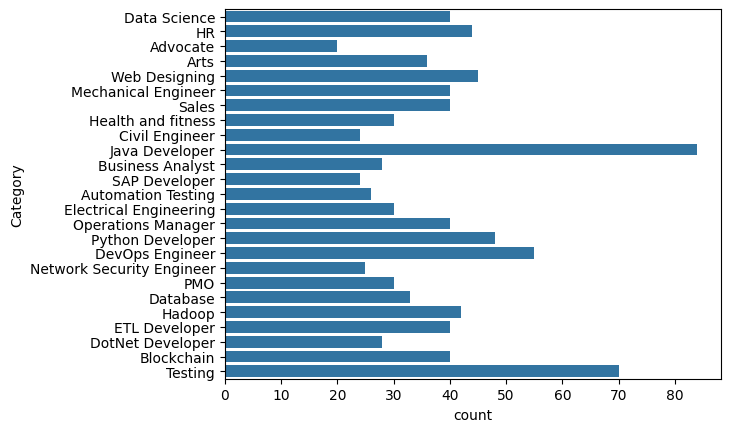

In [13]:
sns.countplot(df['Category'])

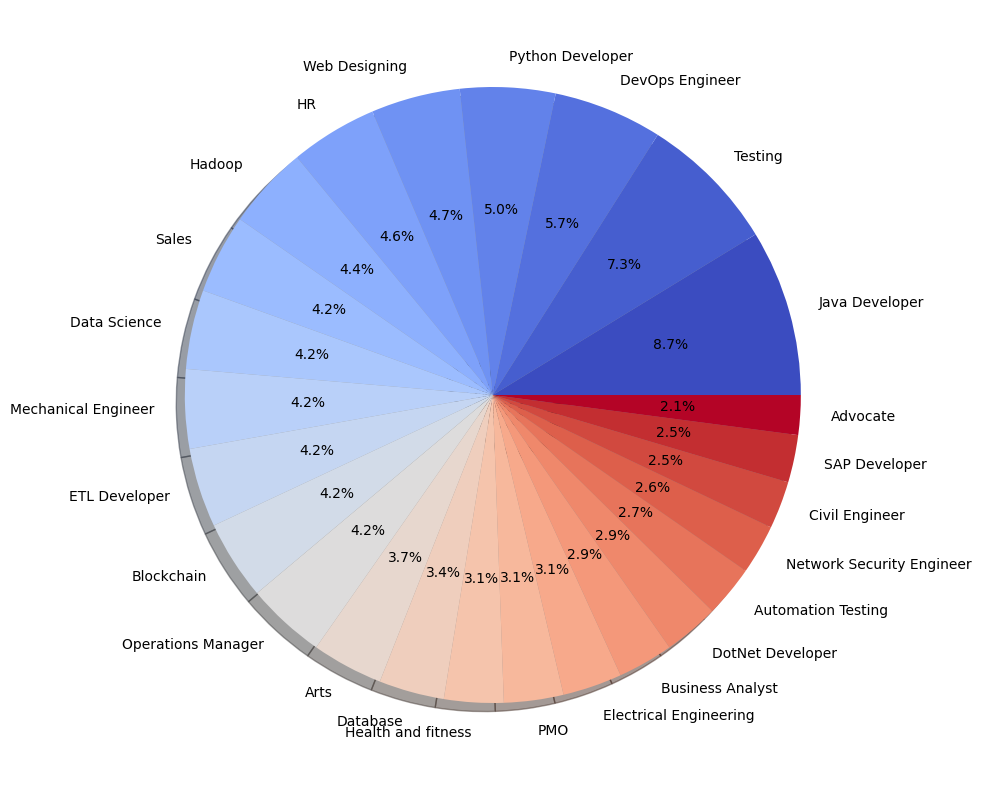

In [25]:
counts = df['Category'].value_counts()
label = counts.index  # Fix: Ensure labels match counts
plt.figure(figsize=(15,10))
plt.pie(counts, labels=label, autopct='%1.1f%%', shadow=True, colors=plt.cm.coolwarm(np.linspace(0, 1, len(label))))  
plt.show()


In [26]:
df


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [27]:
df['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [29]:
df['Resume'][90]


'Skills: Natural Languages: Proficient in English, Hindi and Marathi. Computer skills: Proficient with MS-Office, Internet operation.Education Details \r\nJanuary 2015 to January 2018 LLB Law Mumbai, Maharashtra Mumbai university\r\nJanuary 2015 B.M.M  Mumbai, Maharashtra S.K.Somaiya College, Mumbai University\r\n H.S.C   Asmita Girls junior College, Maharashtra Board\r\n S.S.C Vidya Bhawan  Maharashtra Board\r\nAdvocate \r\n\r\nLlb student and Journalist\r\nSkill Details \r\nCompany Details \r\ncompany - Criminal lawyer (law firm)\r\ndescription - '

# Cleaning data

#1.Url 
#2. hashtags
#3. mentions
#4.special letters
#5.punclutions


In [45]:
import re

def cleanresume(text):
    cleantext = re.sub(r'http\S+\s', ' ', text)  
    cleantext = re.sub(r'@\S+', ' ', cleantext) 
    cleantext = re.sub(r'#\S+', ' ', cleantext)  
    cleantext = re.sub(r'@\S+', ' ', cleantext) 
    cleantext = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleantext)  # Raw escape
    cleantext = re.sub(r'[^\x00-\x7f]', r' ', cleantext)  
    cleantext = re.sub(r'\s+', ' ', cleantext) 
    return cleantext  



In [46]:
cleanresume(" My website like ###### is this https://helloworld and access it @gmail.com")

' My website like is this and access it '

In [47]:
df['Resume']=df['Resume'].apply(lambda x: cleanresume(x))


In [48]:
df['Resume'][90]

'Skills Natural Languages Proficient in English Hindi and Marathi Computer skills Proficient with MS Office Internet operation Education Details January 2015 to January 2018 LLB Law Mumbai Maharashtra Mumbai university January 2015 B M M Mumbai Maharashtra S K Somaiya College Mumbai University H S C Asmita Girls junior College Maharashtra Board S S C Vidya Bhawan Maharashtra Board Advocate Llb student and Journalist Skill Details Company Details company Criminal lawyer law firm description '

# word into categorical values

In [49]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [50]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [51]:
le.fit(df['Category'])
df['Category']= le.transform(df['Category'])


In [89]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [52]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to accept the challenges Positive...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


#vectorization

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(stop_words='english')
required_text = vectorizer.fit_transform(df['Resume'])

In [55]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to accept the challenges Positive...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [57]:

features = vectorizer.get_feature_names_out()
print(features[:20])


['000' '01' '017' '02' '03' '04' '04th' '05' '050education' '06th' '07'
 '07education' '08' '09876971076' '0education' '10' '100' '101' '104'
 '108']


In [74]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(required_text, df['Category'], test_size=0.2, random_state=42)




In [75]:


print(X_train.shape)


(769, 7347)


In [76]:
print(X_test.shape)

(193, 7347)


In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(KNeighborsClassifier())

clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)


In [88]:
y_predict

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [78]:
clf.score(X_train,y_train)*100

98.56957087126138

In [79]:
clf.score(X_test,y_test)*100

98.44559585492227

In [81]:
from sklearn.metrics.pairwise import cosine_similarity

# Example job description
job_description = "Looking for an experienced Data Scientist with expertise in Python, machine learning, and data analytics."

# Convert job description to vector using the same vectorizer
job_vec = vectorizer.transform([job_description])

# Calculate cosine similarity between job description and all resumes
similarities = cosine_similarity(job_vec, required_text)

# Rank resumes by similarity score
ranked_resumes = sorted(zip(similarities.flatten(), df['Resume']), reverse=True)

# Display the top 5 most relevant resumes
for rank, (score, resume) in enumerate(ranked_resumes[:5], start=1):
    print(f"Rank {rank}: {score:.4f} - {resume[:100]}...")  # Show first 100 characters of the resume


Rank 1: 0.2925 - Skills Python Tableau Data Visualization R Studio Machine Learning Statistics IABAC Certified Data S...
Rank 2: 0.2925 - Skills Python Tableau Data Visualization R Studio Machine Learning Statistics IABAC Certified Data S...
Rank 3: 0.2925 - Skills Python Tableau Data Visualization R Studio Machine Learning Statistics IABAC Certified Data S...
Rank 4: 0.2925 - Skills Python Tableau Data Visualization R Studio Machine Learning Statistics IABAC Certified Data S...
Rank 5: 0.2660 - Expertise Data and Quantitative Analysis Decision Analytics Predictive Modeling Data Driven Personal...


In [92]:
import pickle
pickle.dump(vectorizer ,open('vectorizer.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(ranked_resumes ,open('ranked_resumes.pkl','wb'))

#Prediction

In [84]:
myresume='''John Doe

Contact Information:

Email: john.doe@example.com
Phone: +1-555-1234
LinkedIn: linkedin.com/in/johndoe
GitHub: github.com/johndoe
Professional Summary:

A highly motivated and results-driven Data Scientist with over 4 years of experience in data analysis, machine learning, and statistical modeling. Adept at transforming raw data into actionable insights and building predictive models using Python, R, and SQL. Proven ability to lead projects and deliver high-quality solutions in fast-paced environments.

Skills:

Programming Languages: Python, R, SQL
Data Analysis & Visualization: Pandas, NumPy, Matplotlib, Seaborn, Tableau
Machine Learning & AI: scikit-learn, TensorFlow, Keras, XGBoost
Tools & Technologies: Jupyter, Git, Docker, Hadoop
Statistical Techniques: Regression, Classification, Clustering, Time Series Analysis
Education:

Master of Science in Data Science

University of XYZ, 2017 - 2019
Relevant Coursework: Machine Learning, Advanced Data Analysis, Big Data Analytics
Bachelor of Technology in Computer Science

University of ABC, 2013 - 2017
Relevant Coursework: Data Structures, Algorithms, Databases, Software Engineering
Professional Experience:

Data Scientist | Tech Innovations Ltd. | July 2019 - Present

Developed machine learning models to predict customer churn, improving retention rates by 20%.
Conducted exploratory data analysis (EDA) and built visualizations to identify trends and patterns in sales data.
Collaborated with cross-functional teams to optimize marketing campaigns using predictive models.
Junior Data Analyst | Data Solutions Inc. | June 2017 - June 2019

Cleaned, processed, and analyzed large datasets to derive actionable business insights.
Built interactive dashboards in Tableau to visualize key performance indicators (KPIs).
Assisted in developing an automated reporting system using Python.
Certifications:

Certified Data Scientist | Data Science Certification Institute | 2020
Machine Learning Specialization | Coursera (Andrew Ng) | 2019
Certified Data Analyst | Data Analytics Academy | 2018
Projects:

Customer Segmentation (Python): Built a machine learning model to segment customers based on purchasing behavior using K-means clustering.
Stock Price Prediction (R): Developed a time series forecasting model to predict stock prices using ARIMA and LSTM.
Sales Dashboard (Tableau): Created an interactive sales dashboard for a retail company to track monthly performance.
Languages:

English (Fluent)
Spanish (Intermediate)'''

In [94]:
import pickle
clf= pickle.load(open('clf.pkl','rb'))
ranked_resumes = pickle.load(open('ranked_resumes.pkl', 'rb'))
cleaned_resume=cleanresume(myresume)
input_feature=vectorizer.transform([cleaned_resume])
prediction_id=clf.predict(input_feature)[0]
Category_mapping={15: "Java Developer",
            23: "Testing",
            8: "DevOps Engineer",
            20: "Python Developer",
            24: "Web Designing",
            12: "HR",
            13: "Hadoop",
            3: "Blockchain",
            10: "ETL Developer",
            18: "Operations Manager",
            6: "Data Science",
            22: "Sales",
            16: "Mechanical Engineer",
            1: "Arts",
            7: "Database",
            11: "Electrical Engineering",
            14: "Health and fitness",
            19: "PMO",
            4: "Business Analyst",
            9: "DotNet Developer",
            2: "Automation Testing",
            17: "Network Security Engineer",
            21: "SAP Developer",
            5: "Civil Engineer",
            0: "Advocate",
                 }
Category_name=Category_mapping.get(prediction_id,"Unknown")
print("predicted Category:",Category_name)
print(prediction_id)
print("\nTop Ranked Resumes:")
for rank, (score, resume) in enumerate(ranked_resumes[:10], start=1):
    print(f"Rank {rank}: {score:.4f} - {resume[:100]}...")  




predicted Category: Data Science
6

Top Ranked Resumes:
Rank 1: 0.2925 - Skills Python Tableau Data Visualization R Studio Machine Learning Statistics IABAC Certified Data S...
Rank 2: 0.2925 - Skills Python Tableau Data Visualization R Studio Machine Learning Statistics IABAC Certified Data S...
Rank 3: 0.2925 - Skills Python Tableau Data Visualization R Studio Machine Learning Statistics IABAC Certified Data S...
Rank 4: 0.2925 - Skills Python Tableau Data Visualization R Studio Machine Learning Statistics IABAC Certified Data S...
Rank 5: 0.2660 - Expertise Data and Quantitative Analysis Decision Analytics Predictive Modeling Data Driven Personal...
Rank 6: 0.2660 - Expertise Data and Quantitative Analysis Decision Analytics Predictive Modeling Data Driven Personal...
Rank 7: 0.2660 - Expertise Data and Quantitative Analysis Decision Analytics Predictive Modeling Data Driven Personal...
Rank 8: 0.2660 - Expertise Data and Quantitative Analysis Decision Analytics Predictive Modeling 